## Basic Co-Occurrence Analysis of Human-Cell-Atlas Pancreas Topograhic Maps

Data from Tosti et al, 2021

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
from sonar import sonar, utils

In [4]:
rel_kernel_path = 'test/ISS-pancreas' #"."


In [36]:
# Define the cluster labels of the pancreas tissue matrix:

cluster_labels = ['background',
 'Acinar-i',
 'Acinar-s',
 'Acinar-REG+',
 'Activated Stellate',
 'Quiescent Stellate',
 'Alpha',
 'Beta',
 'Gamma (PP)',
 'Delta',
 'Ductal',
 'MUC5B+ Ductal (PDG)',
 'MHC Class II',
 'Schwan',
 'B cell',
 'T cell',
# 'Endothelial'
]

In [6]:
n_sample = 1

# Load the pancreas tissue matrix:

tissue_matrix = np.load(os.path.join( *rel_kernel_path.split('/'), 'data','sample_matrices.npz'))['sample_'+str(n_sample)]

In [7]:
# plt.figure(figsize=(10,10))
# plt.imshow(tissue_matrix.argmax(axis=0),cmap='nipy_spectral',interpolation='none',vmax=len(cluster_labels)-1,alpha=(tissue_matrix.sum(0)!=0).astype(float))

# # Create a legend for different tissue types:
# legend_elements = [plt.scatter([],[],c=plt.cm.nipy_spectral(i/len(cluster_labels)),label=cluster_labels[i]) for i in range(len(cluster_labels))]

# plt.legend(handles=legend_elements,loc='upper right')

In [8]:
rescaled = utils.rescale_topographic_tensor(tissue_matrix, scaling_factor=0.5).numpy()

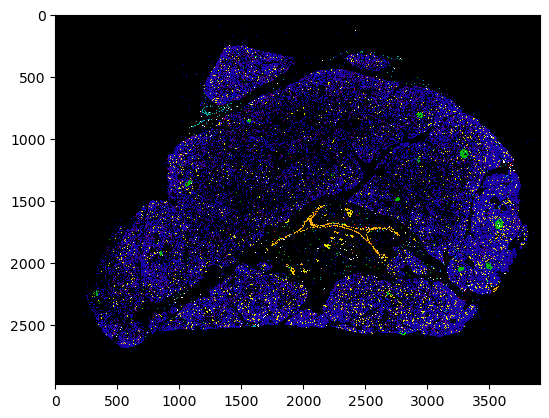

In [9]:
plt.imshow(rescaled.argmax(axis=0),cmap='nipy_spectral',interpolation='none',vmax=len(cluster_labels)-1,alpha=(rescaled.sum(0)!=0).astype(float))

In [10]:
import torch

if torch.cuda.is_available():
    import torch as t
    device = 'cuda:0'
else:
    import torch as t
    device='cpu'

In [11]:
def sig(t, k=1):
    return ((1)/(1+(torch.exp(-t*k))))

def smax(t,k=5):
    return (torch.exp(t*k)/(torch.exp(t*k).sum(0)))

rad_ = 100
lin = 1

son = sonar.Sonar(max_radius=rad_,linear_steps=lin)

cooc_template_ = son.co_occurrence_from_tensor(rescaled,interpolate=True)


In [12]:
cooc_template_.shape

(16, 16, 100)

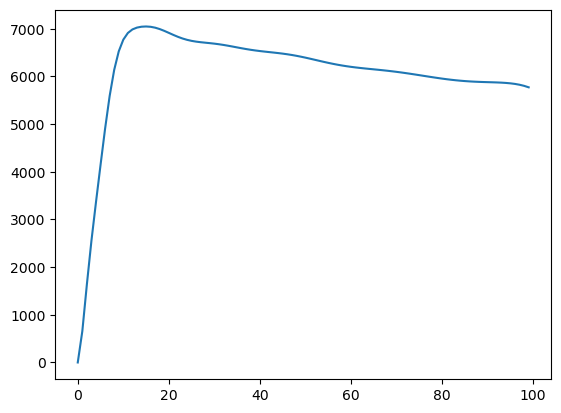

In [13]:
plt.plot(cooc_template_[1,10])

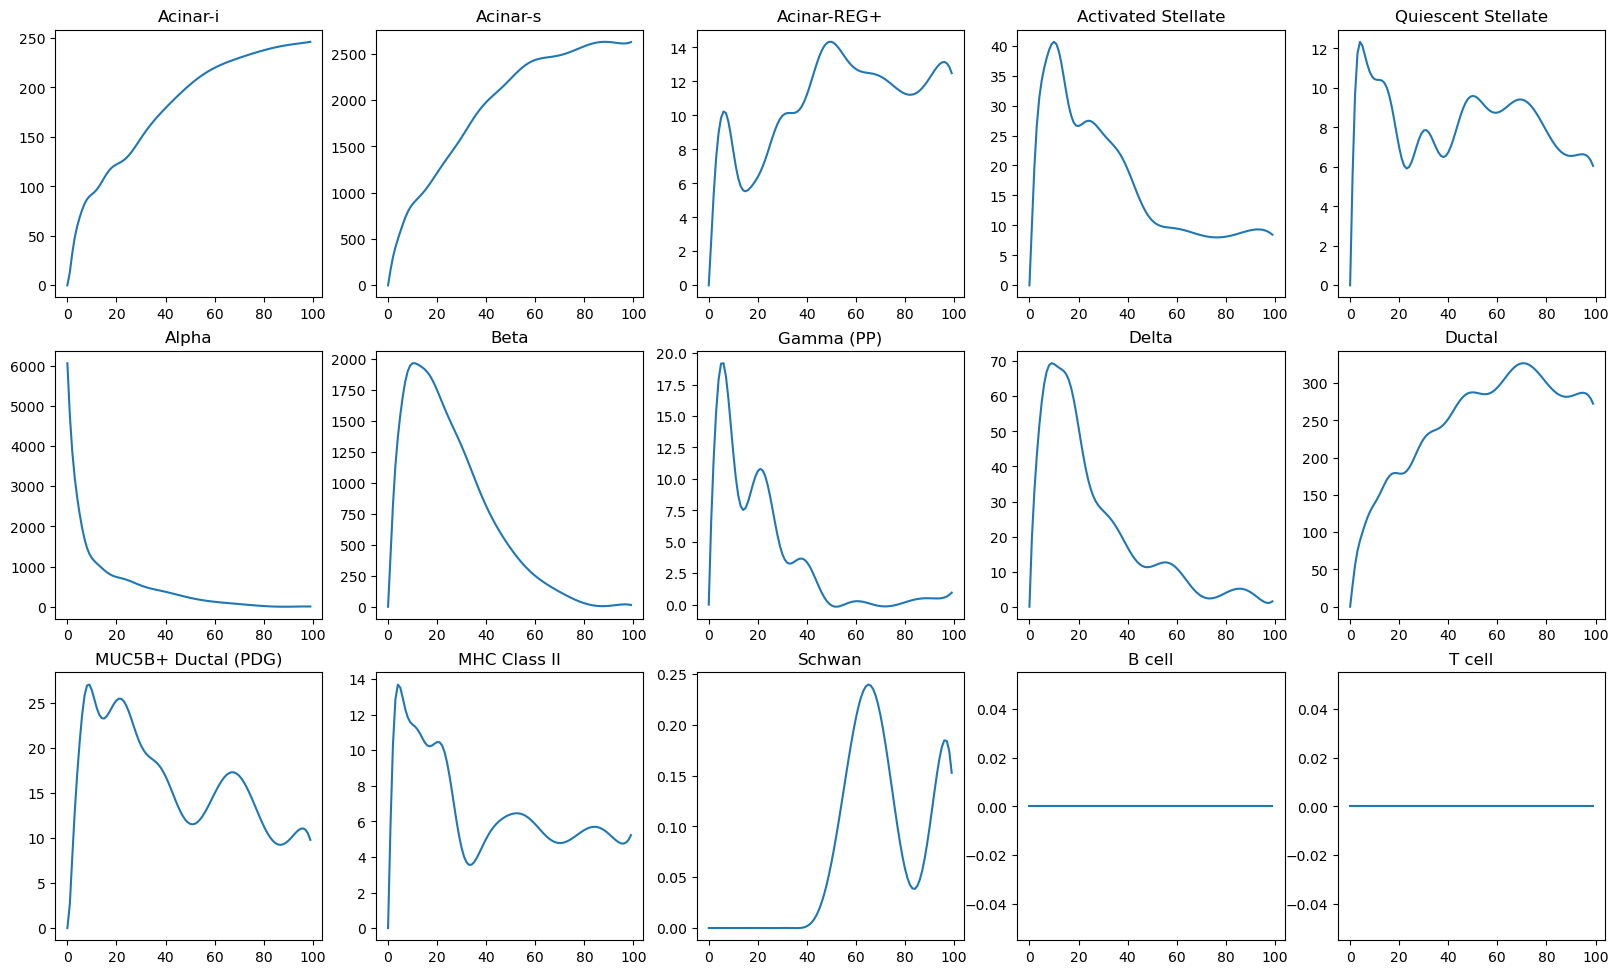

In [54]:
for im in range (15):
    
    plt.subplot(4,5, im+1) #background excluded
    plt.rcParams['figure.figsize'] = [20, 20]
    plt.plot(cooc_template_[6,im+1])
    plt.title(cluster_labels[im+1])

In [15]:
cell_matrix_ecm = torch.zeros((rescaled.shape[0]+1,)+rescaled.shape[1:])
cell_matrix_ecm[:-1]=torch.tensor(rescaled)
cell_matrix_ecm[-1]=~(cell_matrix_ecm.sum(0)>0)

# plt.imshow(cell_matrix_ecm[-1].cpu())

cell_matrix_ecm = cell_matrix_ecm.cpu().numpy()

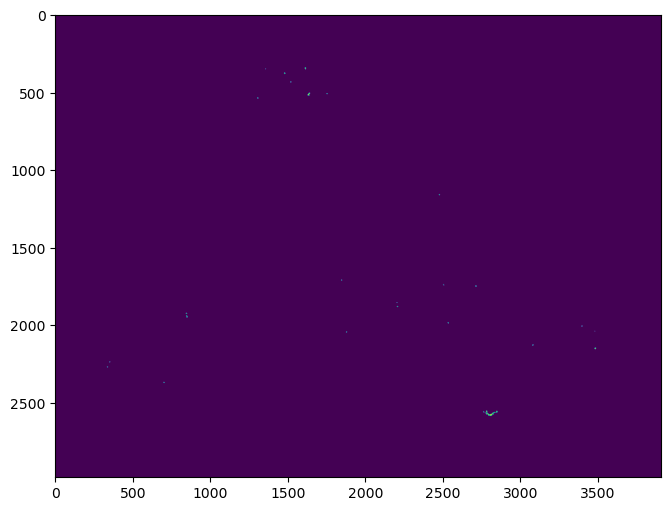

In [52]:
plt.imshow(rescaled[8])
plt.rcParams['figure.figsize'] = [10, 6]